In [40]:
import matplotlib.pyplot as plt
import numpy as np
import tsplib95 # allows easy reading of tsplib files


We expect the results file to have:
```
TSP_FILENAME as a string
SOLUTION_ARRAY as a sequence of indeces
COST as an int
```

if any new values need to be added, we'll change the specs

In [30]:
# read results file

results_file = "../results/dummy_result.txt"
with open(results_file) as results:
    text = results.readlines()
tsp_file = text[0].strip()
solution = list(map(int, str.split(text[1].strip(), " "))) # parse string as list of int
cost = float(text[2].strip())
print("TSP FILE: ", tsp_file)
print("SOLUTION SEQUENCE: ", solution)
print("COST: ", cost)


TSP FILE:  berlin52.tsp
SOLUTION SEQUENCE:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
COST:  69.0


In [23]:
problem = tsplib95.load("../data/"+ tsp_file)
print(problem.name)
print(problem.comment)
print(problem.type)
print(problem.fields_by_keyword)

berlin52
52 locations in Berlin (Groetschel)
TSP
52
{'NAME': <StringField('NAME')>, 'COMMENT': <StringField('COMMENT')>, 'TYPE': <StringField('TYPE')>, 'DIMENSION': <IntegerField('DIMENSION')>, 'CAPACITY': <IntegerField('CAPACITY')>, 'NODE_COORD_TYPE': <StringField('NODE_COORD_TYPE')>, 'EDGE_WEIGHT_TYPE': <StringField('EDGE_WEIGHT_TYPE')>, 'DISPLAY_DATA_TYPE': <StringField('DISPLAY_DATA_TYPE')>, 'EDGE_WEIGHT_FORMAT': <StringField('EDGE_WEIGHT_FORMAT')>, 'EDGE_DATA_FORMAT': <StringField('EDGE_DATA_FORMAT')>, 'NODE_COORD_SECTION': <IndexedCoordinatesField('NODE_COORD_SECTION')>, 'EDGE_DATA_SECTION': <EdgeDataField('EDGE_DATA_SECTION')>, 'EDGE_WEIGHT_SECTION': <MatrixField('EDGE_WEIGHT_SECTION')>, 'DISPLAY_DATA_SECTION': <IndexedCoordinatesField('DISPLAY_DATA_SECTION')>, 'FIXED_EDGES_SECTION': <EdgeListField('FIXED_EDGES_SECTION')>, 'DEPOT_SECTION': <DepotsField('DEPOT_SECTION')>, 'DEMAND_SECTION': <DemandsField('DEMAND_SECTION')>, 'TOUR_SECTION': <ToursField('TOUR_SECTION')>}


/tmp/ipykernel_10778/2973058762.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


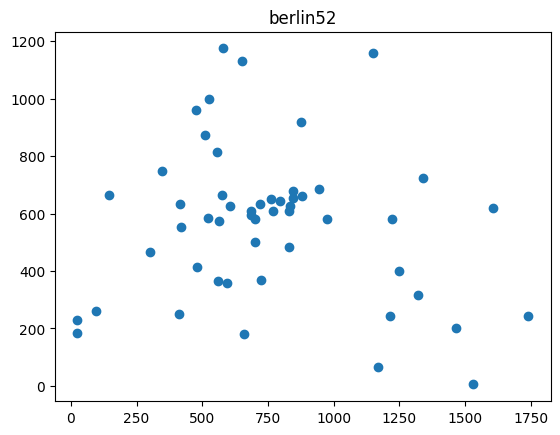

In [69]:
fig, ax = plt.subplots()
X = np.array([])
Y = np.array([])


for index in problem.get_nodes():
    x, y = problem.node_coords[index]
    X = np.append(X, x)
    Y = np.append(Y, y)
# problem.get_weight(1, 2)

ax.scatter(X, Y)
ax.set_title(problem.name)

fig.show()